In [6]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO

from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
from test_utils import *
from train_utils import *
from orchestrator import *
import pandas as pd

%load_ext autoreload
%autoreload 2 

plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
setpoints = [2.6251,2.6251, 2.6253]
seeds = [0, 42, 96]
agent_types = ['wcsac', 'safesac', 'augsac']

for i, seed in enumerate(seeds) :
  setpoint = setpoints[i]
  core_env = SphericalTank(desired_state=np.array([setpoint]), seed = seed, max_episode_len=150)
  agent, env = train_default_sac(core_env = core_env, 
                                 desired_state= setpoint, 
                                 seed = seed, 
                                 n_episodes = 200, 
                                 observation_type='setpoint-error', 
                                 randomise_setpoint=True, 
                                 rescale_observation=True)

Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/setpoint-error/randomised/0618/Desired2.6181/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -490     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 18       |
|    time_elapsed    | 32       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 7.28     |
|    critic_loss     | 0.192    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |         

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6181' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -759     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 40       |
|    time_elapsed    | 14       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 11.1     |
|    critic_loss     | 0.451    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -639     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 35       |
|    time_elapsed    | 33       |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 22.8     |
|    critic_loss     | 0.169    |
|    ent_coef        | 0.5      |
|    learning_

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6182' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -843     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 41       |
|    time_elapsed    | 14       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 12.8     |
|    critic_loss     | 0.46     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -675     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 39       |
|    time_elapsed    | 30       |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 23       |
|    critic_loss     | 0.179    |
|    ent_coef        | 0.5      |
|    learning_

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6183' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [7]:
setpoints = [2.6261,2.6262, 2.6263]
seeds = [0, 42, 85]
agent_types = ['wcsac', 'safesac', 'augsac']

for i, seed in enumerate(seeds) :
  setpoint = setpoints[i]
  core_env = SphericalTank(desired_state=np.array([setpoint]), seed = seed)
  # agent, env = train_default_sac(core_env = core_env, 
  #                                desired_state= setpoint, 
  #                                seed = seed, 
  #                                n_episodes = 200, 
  #                                observation_type='setpoint-error', 
  #                                randomise_setpoint=True)
  try :
    agent = SAC.load(f'models\\SphericalTank\\setpoint-error\\randomised\\Desired{setpoint}\sac.zip')
  except: 
    agent, env = train_default_sac(core_env = core_env, 
                                    desired_state= setpoint, 
                                    seed = seed, 
                                    n_episodes = 200, 
                                    observation_type='setpoint-error', 
                                    randomise_setpoint=True)
  for agent_type in agent_types: 
    for avg_q in [True, False]:
      if avg_q == False and agent_type == 'augsac':
        continue
      
      safe_agent, env, delay_history, setpoint_history = train_default_augmented_sac(core_env = core_env, 
                                              agent_type= agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type='setpoint-error',
                                              randomise_setpoint=True, 
                                              random_delay=True,
                                              average_q=avg_q,
                                              n_episodes=200, 
                                              ent_coef=0.5,
                                              undelayed_critic=agent.critic)
      # min_str = 'min' if not avg_q else ''
      # np.save(f'histories/delay/RobotSteer/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', delay_history)
      # np.save(f'histories/setpoint/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', setpoint_history)
 





Desired trajectory None and desired state [2.6261]
Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/setpoint-error/randomised/0626/Desired2.6261/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -521     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 22       |
|    time_elapsed    | 26       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 7.55     |
|    critic_loss     | 0.24     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
--------------

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6261' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -778     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 14       |
|    time_elapsed    | 40       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 12.3     |
|    critic_loss     | 2.06     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -669     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 13       |
|    time_elapsed    | 85       |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 20.5     |
|    critic_loss     | 0.485    |
|    ent_coef        | 0.5      |
|    learning_

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6262' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -897     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 13       |
|    time_elapsed    | 45       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 14.9     |
|    critic_loss     | 0.73     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -968     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 10       |
|    time_elapsed    | 115      |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 31.7     |
|    critic_loss     | 0.314    |
|    ent_coef        | 0.5      |
|    learning_

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6263' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -794     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 12       |
|    time_elapsed    | 47       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 12.6     |
|    critic_loss     | 3.39     |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -697     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 11       |
|    time_elapsed    | 100      |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 22.2     |
|    critic_loss     | 0.591    |
|    ent_coef        | 0.5      |
|    learning_

In [5]:
setpoints = [ 2.6252]
seeds = [0]
agent_types = ['wcsac', 'safesac', 'augsac']

for i, seed in enumerate(seeds) :
  setpoint = setpoints[i]
  core_env = SphericalTank(desired_state=np.array([setpoint]), seed = seed)
  # agent, env = train_default_sac(core_env = core_env, 
  #                                desired_state= setpoint, 
  #                                seed = seed, 
  #                                n_episodes = 200, 
  #                                observation_type='setpoint-error', 
  #                                randomise_setpoint=True)
  try :
    agent = SAC.load(f'models\\SphericalTank\\setpoint-error\\randomised\\Desired{setpoint}\sac.zip')
  except: 
    agent, env = train_default_sac(core_env = core_env, 
                                    desired_state= setpoint, 
                                    seed = seed, 
                                    n_episodes = 200, 
                                    observation_type='setpoint-error', 
                                    randomise_setpoint=True)
  for agent_type in agent_types: 
    for avg_q in [True, False]:
      if avg_q == False and agent_type == 'augsac':
        continue
      
      safe_agent, env, delay_history, setpoint_history = train_default_augmented_sac(core_env = core_env, 
                                              agent_type= agent_type,
                                              desired_state= setpoint,
                                              seed = seed,
                                              observation_type='setpoint-error',
                                              randomise_setpoint=True, 
                                              random_delay=True,
                                              average_q=avg_q,
                                              n_episodes=200, 
                                              ent_coef=0.5,
                                              undelayed_critic=agent.critic)
      # min_str = 'min' if not avg_q else ''
      # np.save(f'histories/delay/RobotSteer/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', delay_history)
      # np.save(f'histories/setpoint/{agent_type}{min_str}_seed{seed}_setpoint{setpoint}', setpoint_history)
 





Desired trajectory None and desired state [2.6252]
Wrapping in random setpoint
Regions limits are [[array([0.2]), array([1.4])], [array([1.4]), array([2.6])], [array([2.6]), array([3.8])]]
Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/SphericalTank/setpoint-error/randomised/0626/Desired2.6252/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -761     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 29       |
|    time_elapsed    | 20       |
|    total_timesteps | 600      |
| train/             |          |
|    actor_loss      | 10.7     |
|    critic_loss     | 0.258    |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 499      |
---------------------------------
--------------

c:\Users\seigpaw\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\save_util.py:284: UserWarning: Path 'models\SphericalTank\setpoint-error\randomised\Desired2.6252' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 150       |
|    ep_rew_mean     | -1.04e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 14        |
|    time_elapsed    | 42        |
|    total_timesteps | 600       |
| train/             |           |
|    actor_loss      | 15.9      |
|    critic_loss     | 3.85      |
|    ent_coef        | 0.5       |
|    learning_rate   | 0.0003    |
|    n_updates       | 499       |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -837     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 13       |
|    time_elapsed    | 91       |
|    total_timesteps | 1200     |
| train/             |          |
|    actor_loss      | 26.2     |
|    critic_loss     | 0.624    |
|    ent_coef        | 0.5      

Wrapping in observe setpoint error
Rescaling action
Rescaling observation
Initial state was [ 0.         -0.16896899]


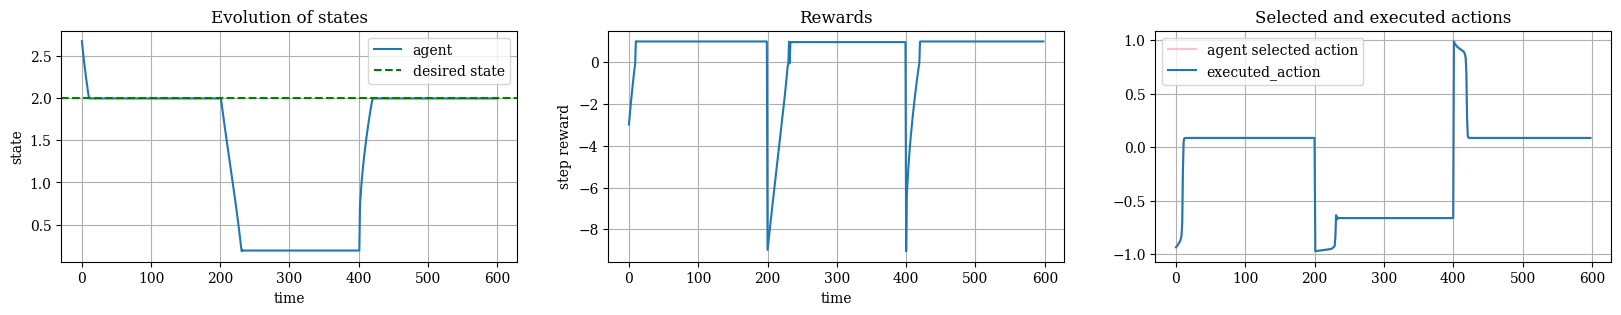

In [24]:
core_env = SphericalTank(desired_state=np.array([0.2, 3.3, 2.0]), max_episode_len=600)
env = init_wrappers(core_env, observation_type='setpoint-error', randomise_setpoint=False)

agent = SAC.load(f'models\\SphericalTank\\setpoint-error\\randomised\\Desired{2.6183}\sac.zip')

states, actions, rewards, avg, executed = test_agent(agent, env, deterministic=True, state_error=True)
plot_test(env, states, actions, rewards, avg, executed)